<a href="https://colab.research.google.com/github/felixyuzhenyang/MSSP-6070-YuzhenYang/blob/main/PARTICIPATION_ACTIVITY_Week_7_YuzhenYang.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import userdata
import os
os.chdir('/content')
github_token = userdata.get('GitHub_MSSP6070')
owner = 'felixyuzhenyang'
repository = 'MSSP-6070-YuzhenYang'

clone_url = f'https://{github_token}@github.com/{owner}/{repository}.git'

!git clone {clone_url}

Cloning into 'MSSP-6070-YuzhenYang'...
remote: Enumerating objects: 229, done.
remote: Counting objects: 100% (40/40), done.
remote: Compressing objects: 100% (33/33), done.
remote: Total 229 (delta 20), reused 12 (delta 7), pack-reused 189 (from 1)
Receiving objects: 100% (229/229), 7.09 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (124/124), done.


In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter

working_directory = '/content/MSSP-6070-YuzhenYang/data/Week07'
try:
    os.chdir(working_directory)
    print(f"New working path successfully set: {os.getcwd()}")
except FileNotFoundError:
    print(f"error: path not exist: {working_directory}")

df = pd.read_csv('InternetSales.csv', encoding="latin1", low_memory=False)

New working path successfully set: /content/MSSP-6070-YuzhenYang/data/Week07


In [3]:
# transfer to numeric
df["OrderDate"]   = pd.to_datetime(df["OrderDate"], errors="coerce")
df["SalesAmount"] = pd.to_numeric(df["SalesAmount"], errors="coerce")

# extract year
df = df.dropna(subset=["OrderDate", "SalesAmount"])
df["Year"] = df["OrderDate"].dt.year

# sum by year
yearly_sales = (
    df.groupby("Year", as_index=False)["SalesAmount"]
      .sum()
      .sort_values("Year")
)

   Year   SalesAmount
0  2010  4.342104e+04
1  2011  7.075526e+06
2  2012  5.842485e+06
3  2013  1.635155e+07
4  2014  4.569472e+04


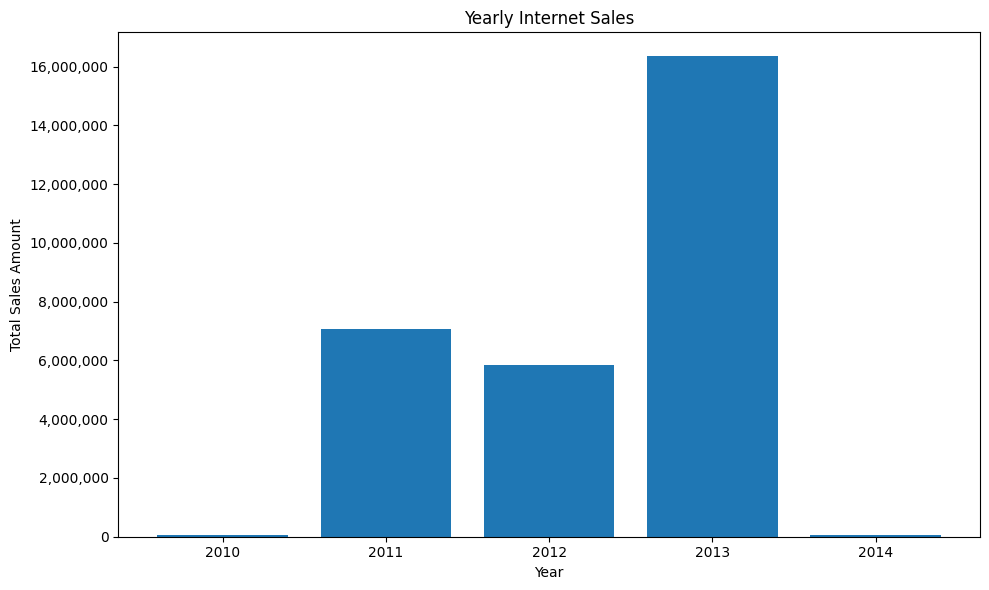

In [4]:
# plot
plt.figure(figsize=(10, 6))
plt.bar(yearly_sales["Year"], yearly_sales["SalesAmount"])
plt.title("Yearly Internet Sales")
plt.xlabel("Year")
plt.ylabel("Total Sales Amount")
plt.gca().yaxis.set_major_formatter(StrMethodFormatter("{x:,.0f}"))
plt.xticks(yearly_sales["Year"])
plt.tight_layout()

plt.savefig("yearly_sales.pdf", format="pdf", dpi=300, bbox_inches="tight")
yearly_sales.to_csv("yearly_sales.csv", index=False)

print(yearly_sales.head(10))
plt.show()